In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
import os
os.chdir(r"C:\Users\AElegido\Desktop\Data Analyst\Final Project\data")

# DATA VALIDATION

The original data consists of 281 rows and 16 columns with missing values in various columns. There were 20 duplicate rows found and removed, resulting in 261 unique rows. After validation and imputation, there are 261 rows remaining. The following describes what was done to each column:

• research_development_spent: There were 20 missing values in this column. Given the likely skewed distribution, median imputation was used to handle these missing values, which is less sensitive to extreme values and maintains the structure of the data.

• administration: There were 10 missing values in this column. Median imputation was used to handle these missing values, maintaining the structure of the data and being less sensitive to extreme values.

• marketing_spent: This column had 10 missing values. Median imputation was used to handle the missing values, ensuring the structure of the data is maintained and being less sensitive to extreme values.

• state_usa: This categorical column had no missing values and needed no cleaning.

• profit: There were 10 missing values in this column. Median imputation was used to handle these missing values, maintaining the structure of the data and being less sensitive to extreme values.

• convictions_per_capita: This column had 1 missing value. Median imputation was used to handle the missing value, maintaining the structure of the data and being less sensitive to extreme values.

• estimate: This column had no missing values and needed no cleaning.

• avg_price, min_price, max_price, average_income, minimum_income, maximum_income, avg_spending, min_spending, max_spending: All of these columns had 1 missing value each. Median imputation was used to handle these missing values, maintaining the structure of the data and being less sensitive to extreme values.

In summary, the data validation and preprocessing steps resulted in a cleaned dataset with 261 rows and 16 columns. The 20 duplicate rows were removed, and for the 'research_development_spent', 'administration', 'marketing_spent', 'profit', 'convictions_per_capita', 'avg_price', 'min_price', 'max_price', 'average_income', 'minimum_income', 'maximum_income', 'avg_spending', 'min_spending', and 'max_spending' columns, missing values were imputed using the median imputation method.


The dataset is now ready for further analysis.

In [3]:
data = pd.read_csv('data.csv')
data.head()

,research_development_spent,administration,marketing_spent,state_usa,profit,convictions_per_capita,estimate,avg_price,min_price,max_price,average_income,minimum_income,maximum_income,avg_spending,min_spending,max_spending
0,165349.20,136897.80,471784.10,New York,192261.83,1.59,19453561,4968.75,3500.0,30000.0,70137.0,33332.0,128558.0,225.75,100.0,500.0
1,144372.41,118671.85,383199.62,New York,182901.99,1.59,19453561,4968.75,3500.0,30000.0,70137.0,33332.0,128558.0,225.75,100.0,500.0
2,131876.90,99814.71,362861.36,New York,156991.12,1.59,19453561,4968.75,3500.0,30000.0,70137.0,33332.0,128558.0,225.75,100.0,500.0
3,120542.52,148718.95,311613.29,New York,152211.77,1.59,19453561,4968.75,3500.0,30000.0,70137.0,33332.0,128558.0,225.75,100.0,500.0
4,114523.61,122616.84,261776.23,New York,129917.04,1.59,19453561,4968.75,3500.0,30000.0,70137.0,33332.0,128558.0,225.75,100.0,500.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   research_development_spent  271 non-null    float64
 1   administration              271 non-null    float64
 2   marketing_spent             271 non-null    float64
 3   state_usa                   281 non-null    object 
 4   profit                      271 non-null    float64
 5   convictions_per_capita      280 non-null    float64
 6   estimate                    281 non-null    int64  
 7   avg_price                   280 non-null    float64
 8   min_price                   280 non-null    float64
 9   max_price                   280 non-null    float64
 10  average_income              280 non-null    float64
 11  minimum_income              280 non-null    float64
 12  maximum_income              280 non-null    float64
 13  avg_spending                280 non

In [5]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows
data = data.drop_duplicates()

Number of duplicate rows: 20


In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

research_development_spent    10
administration                10
marketing_spent               10
state_usa                      0
profit                        10
convictions_per_capita         1
estimate                       0
avg_price                      1
min_price                      1
max_price                      1
average_income                 1
minimum_income                 1
maximum_income                 1
avg_spending                   1
min_spending                   1
max_spending                   1
dtype: int64


In [7]:
data.describe()

,research_development_spent,administration,marketing_spent,profit,convictions_per_capita,estimate,avg_price,min_price,max_price,average_income,minimum_income,maximum_income,avg_spending,min_spending,max_spending
count,2.510000e+02,251.000000,251.000000,2.510000e+02,260.000000,2.610000e+02,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,8.497753e+05,99557.249363,105288.085418,1.252204e+06,1.585385,1.049045e+07,2716.610577,1753.846154,5763.461538,63838.569231,29986.507692,114585.173077,209.335577,77.307692,469.038462
std,6.453447e+05,28818.151687,80169.372163,9.497517e+05,0.915018,1.118595e+07,1365.142200,935.416728,6678.844282,10541.914035,4906.690497,21083.504290,54.015447,38.548239,137.942123
min,0.000000e+00,50416.900000,0.000000,1.468140e+04,0.430000,5.787590e+05,1382.000000,800.000000,1000.000000,46254.000000,21967.000000,78605.000000,125.500000,25.000000,250.000000
25%,1.542628e+05,75204.400000,57205.000000,2.364235e+05,1.060000,2.976149e+06,1715.125000,1000.000000,3000.000000,55685.000000,26550.000000,97224.000000,175.250000,50.000000,350.000000
50%,8.502650e+05,101145.550000,87831.000000,1.154272e+06,1.390000,5.758736e+06,2236.000000,1500.000000,3500.000000,60434.000000,28841.000000,111915.000000,200.250000,75.000000,450.000000
75%,1.447122e+06,122395.370000,113429.000000,2.149321e+06,1.870000,1.945356e+07,3021.125000,2000.000000,5000.000000,72027.000000,33432.000000,128558.000000,225.750000,100.000000,500.000000
max,1.997934e+06,182645.560000,471784.100000,2.946680e+06,8.350000,3.951222e+07,5975.500000,4500.000000,30000.000000,89392.000000,42343.000000,167535.000000,350.000000,200.000000,800.000000


In [8]:
# Impute missing values with median
columns_to_impute = [
    "research_development_spent", "administration", "marketing_spent", "profit",
    "convictions_per_capita", "avg_price", "min_price", "max_price",
    "average_income", "minimum_income", "maximum_income",
    "avg_spending", "min_spending", "max_spending"
]

for column in columns_to_impute:
    data[column] = data[column].fillna(data[column].median())

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 280
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   research_development_spent  261 non-null    float64
 1   administration              261 non-null    float64
 2   marketing_spent             261 non-null    float64
 3   state_usa                   261 non-null    object 
 4   profit                      261 non-null    float64
 5   convictions_per_capita      261 non-null    float64
 6   estimate                    261 non-null    int64  
 7   avg_price                   261 non-null    float64
 8   min_price                   261 non-null    float64
 9   max_price                   261 non-null    float64
 10  average_income              261 non-null    float64
 11  minimum_income              261 non-null    float64
 12  maximum_income              261 non-null    float64
 13  avg_spending                261 non

# Exploratory Data Analysis (EDA):

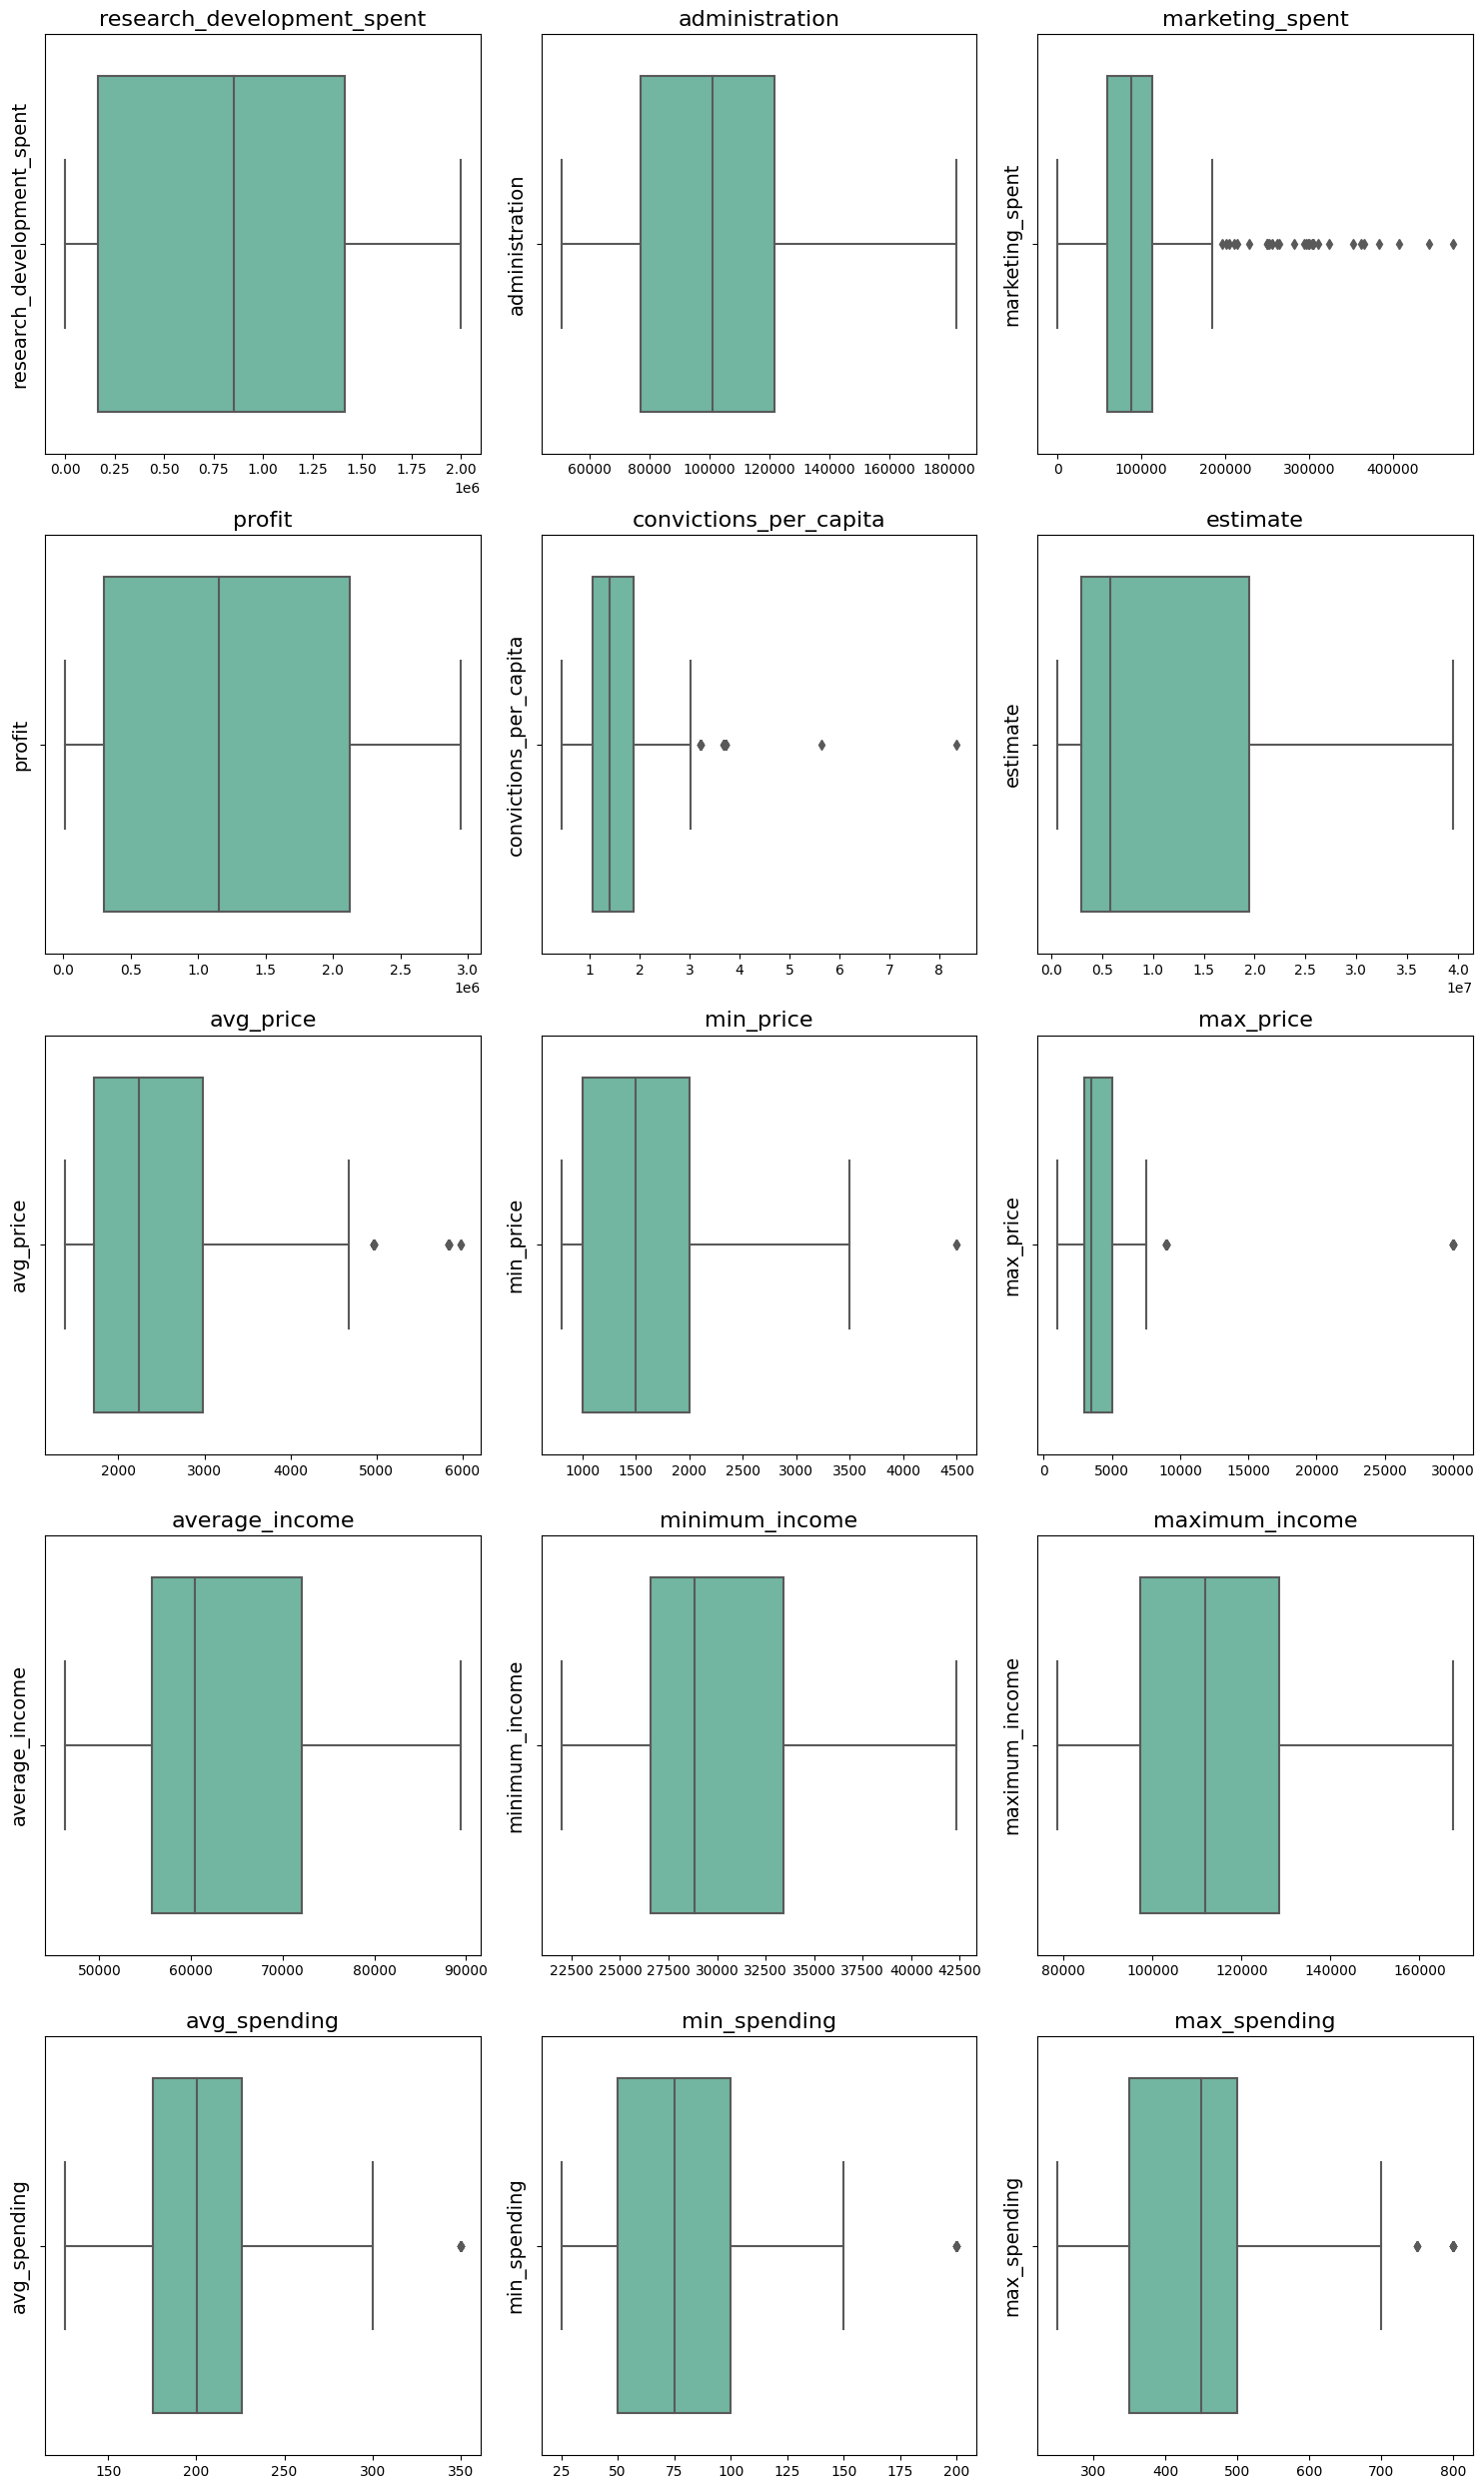

In [10]:
columns_to_plot = [
    "research_development_spent", "administration", "marketing_spent", "profit",
    "convictions_per_capita", "estimate", "avg_price", "min_price", "max_price",
    "average_income", "minimum_income", "maximum_income",
    "avg_spending", "min_spending", "max_spending"
]


n_cols = 3
n_rows = len(columns_to_plot) // n_cols + (1 if len(columns_to_plot) % n_cols > 0 else 0)


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

axes = axes.flatten()


for idx, column in enumerate(columns_to_plot):
    # Set the color palette
    palette = sns.color_palette("Set2")

    # Create the box plot
    sns.boxplot(x=data[column], ax=axes[idx], color=palette[0])

    # Set the title of the subplot
    axes[idx].set_title(f"{column}", fontsize=16)

    # Remove the x-axis label
    axes[idx].set_xlabel("")

    # Set the y-axis label
    axes[idx].set_ylabel(f"{column}", fontsize=14)


for idx in range(len(columns_to_plot), n_rows * n_cols):
    fig.delaxes(axes[idx])


plt.tight_layout()
plt.show()

Based on the box plot provided, it appears that this dataset contains information on several variables such as research and development spending, administration costs, marketing expenses, profit, and different measures of income, spending, and pricing across multiple locations.

One interesting aspect of the data is the wide range of values for some of the variables, such as the maximum spending, maximum income, and maximum price. For example, the maximum spending is over 800 units, while the minimum is only 25 units. Similarly, the maximum income is nearly three times the minimum income, and the maximum price is 30 times the minimum price.

Another noteworthy observation is that the mean profit is much higher than the mean convictions per capita, which suggests that the locations included in the dataset are generally prosperous and have low crime rates. This is further supported by the fact that the average income is over twice the average spending, indicating that people in these locations have a high level of disposable income.

Overall, this data provides an interesting glimpse into the spending, income, and pricing patterns across multiple locations, and could be used to identify trends or patterns that may be useful in business or economic analysis. Further analysis and modeling could help uncover any relationships or dependencies between the different variables and provide insights into their drivers and potential impacts.

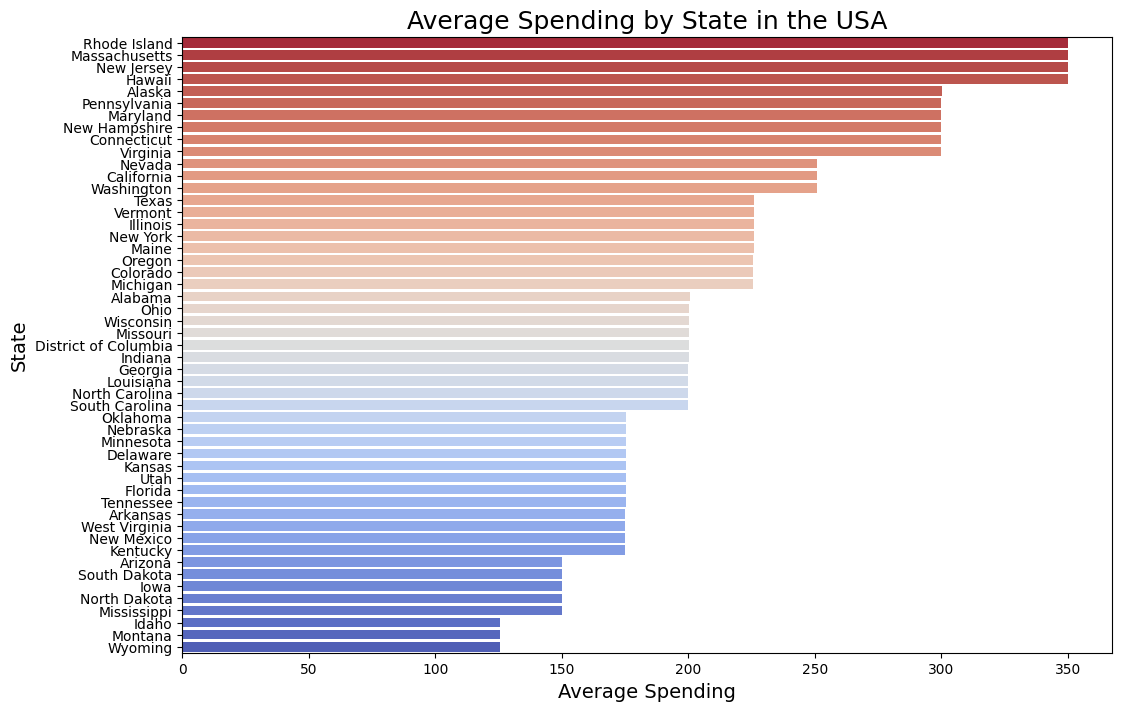

In [11]:
grouped_df_avg_spending = data.groupby('state_usa')['avg_spending'].mean()
sorted_df_avg_spending = grouped_df_avg_spending.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
palette = sns.color_palette("coolwarm_r", len(sorted_df_avg_spending))
sns.barplot(y=sorted_df_avg_spending.index, x=sorted_df_avg_spending, palette=palette)
plt.title('Average Spending by State in the USA', fontsize=18)
plt.ylabel('State', fontsize=14)
plt.xlabel('Average Spending', fontsize=14)
plt.show()

This data above appears to show the average spending per capita across various US states. The data indicates that Rhode Island, Massachusetts, New Jersey, and Hawaii have the highest average spending per capita, all coming in at around $350.

Interestingly, there is a notable drop in average spending as we move towards the western part of the country. California, Washington, and Nevada all have an average spending of around 250 USD, while Arizona and South Dakota have the lowest average spending at 150 USD.

The data also shows that there is considerable variation in spending within regions. For example, while the northeastern states generally have higher average spending, New York and Maine have an average spending of only $225. Similarly, while most states in the Midwest have an average spending of around 175 USD, Iowa, North Dakota, and South Dakota all have an average spending of only 150 USD.

This data could be useful for businesses or policymakers who are looking to understand consumer behavior and spending patterns in different regions of the country. It could also be used to identify potential areas for growth or investment based on consumer demand and preferences. Further analysis could help uncover any underlying factors that may be driving the differences in spending across states and provide insights into how to better serve and target different markets.

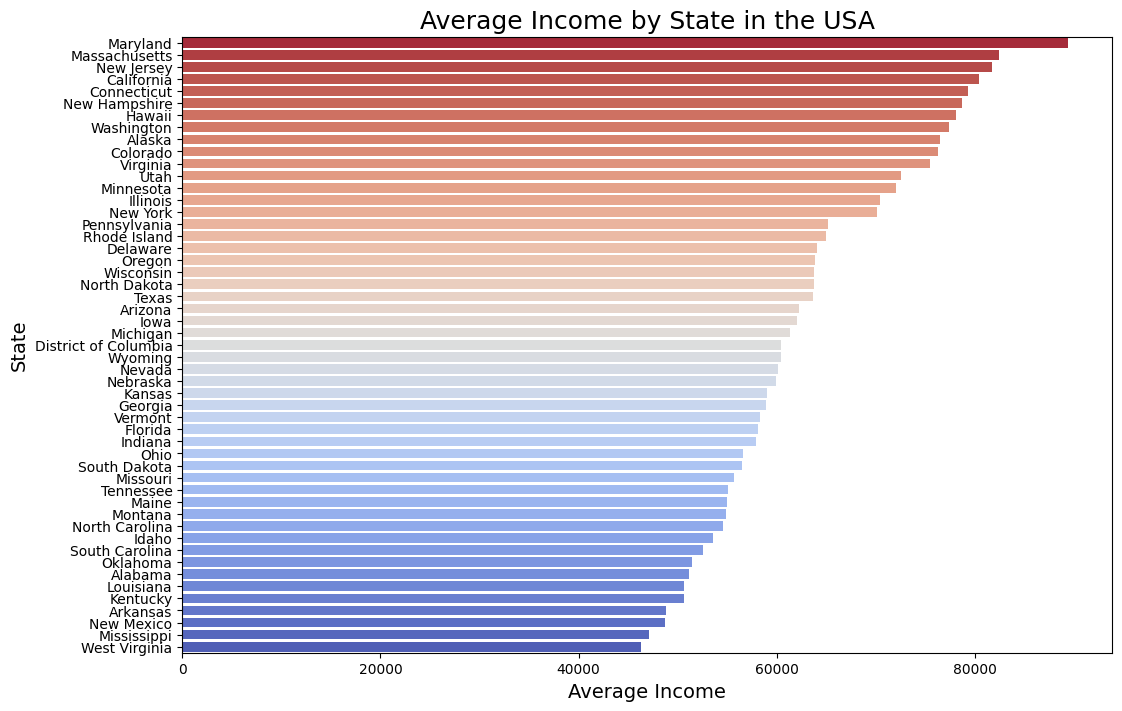

In [12]:
grouped_df_avg_income = data.groupby('state_usa')['average_income'].mean()
sorted_df_avg_income = grouped_df_avg_income.sort_values(ascending=False)


plt.figure(figsize=(12, 8))
palette = sns.color_palette("coolwarm_r", len(sorted_df_avg_income))
sns.barplot(y=sorted_df_avg_income.index, x=sorted_df_avg_income, palette=palette)
plt.title('Average Income by State in the USA', fontsize=18)
plt.ylabel('State', fontsize=14)
plt.xlabel('Average Income', fontsize=14)
plt.show()

This dataset appears to show the average income per capita across various US states. According to the data, Maryland has the highest average income at 89,392 USD, followed closely by Massachusetts and New Jersey. On the other hand, West Virginia has the lowest average income at 46,254 USD.

Interestingly, there is considerable variation in income across states. For example, while most of the northeastern states have high average incomes, New York and Pennsylvania have average incomes closer to the national average. Similarly, while most of the southern states have lower average incomes, Georgia has an average income higher than the national average.

The data also shows that there is some overlap in income across states. For example, both Wyoming and the District of Columbia have the same average income of $60,434. Additionally, the income difference between neighboring states can be quite significant. For example, while Maryland has the highest average income, its neighbor West Virginia has the lowest.

This data could be useful for businesses or policymakers who are looking to understand consumer purchasing power and the overall economic conditions in different regions of the country. It could also be used to identify potential areas for growth or investment based on consumer demand and preferences. Further analysis could help uncover any underlying factors that may be driving the differences in income across states and provide insights into how to better serve and target different markets.

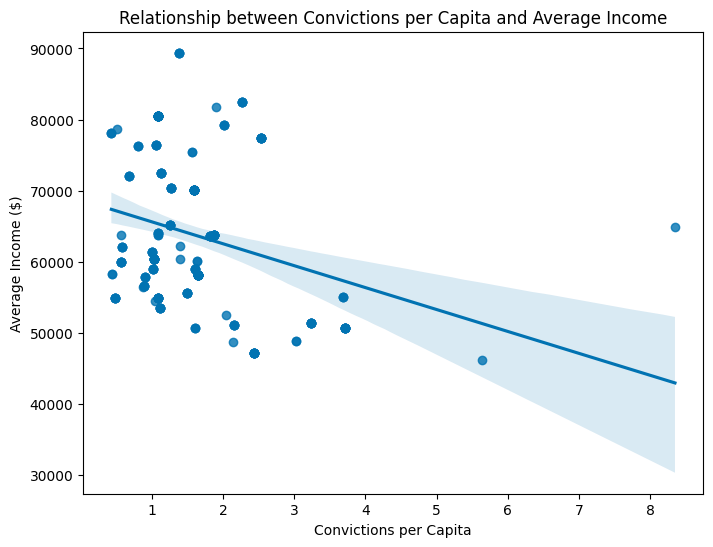

In [13]:
plt.figure(figsize=(8, 6))
sns.set_palette("colorblind")
sns.regplot(x='convictions_per_capita', y='average_income', data=data)
plt.xlabel('Convictions per Capita')
plt.ylabel('Average Income ($)')
plt.title('Relationship between Convictions per Capita and Average Income')
plt.show()

Based on the data provided, we can see a negative relationship between the number of convictions per capita and average income. As the number of convictions per capita increases, the average income decreases. This suggests that there may be a correlation between crime rates and socioeconomic factors.

The data shows that the lowest number of convictions per capita is 0.43, with an average income of 67,381.76 USD. As the number of convictions per capita increases by 0.08, the average income decreases by approximately 246.40 USD. The highest number of convictions per capita is 8.35, with an average income of 42,988.43 USD.

Overall, the data suggests that there is a significant difference in average income between areas with low and high convictions per capita. This could be due to a variety of factors, such as differences in education, employment opportunities, and social support.

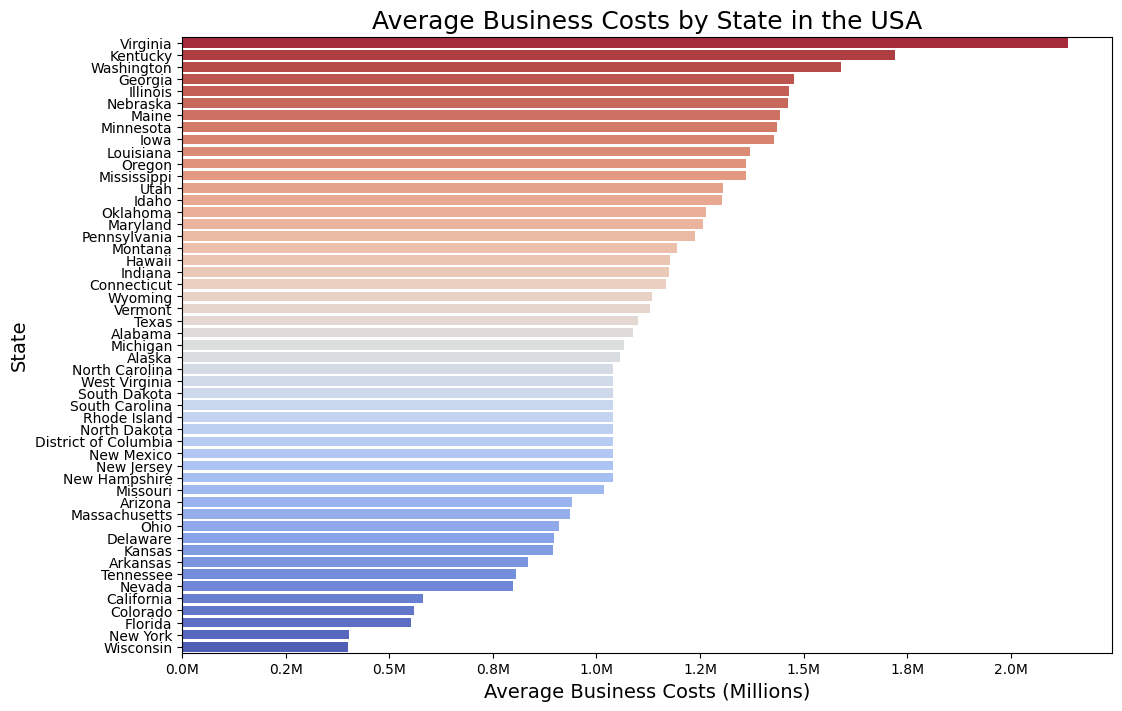

In [14]:
from matplotlib.ticker import FuncFormatter

def millions_formatter(x, pos):
    return f"{x / 1_000_000:.1f}M"

grouped_df = data.groupby('state_usa').mean()
grouped_df['total_spent'] = (
    grouped_df["research_development_spent"]
    + grouped_df["marketing_spent"]
    + grouped_df["administration"]
)
sorted_df_total_spent = grouped_df.sort_values(by='total_spent',ascending=False)


plt.figure(figsize=(12, 8))
palette = sns.color_palette("coolwarm_r", len(sorted_df_total_spent))
sns.barplot(y=sorted_df_total_spent.index, x='total_spent', data=sorted_df_total_spent, palette=palette, errorbar=None)
plt.title('Average Business Costs by State in the USA', fontsize=18)
plt.ylabel('State', fontsize=14)
plt.xlabel('Average Business Costs (Millions)', fontsize=14)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()

This barchart shows the total amount spent on healthcare per capita across various US states. Virginia has the highest total spending per capita, with an average of around 2.1 million USD, followed by Kentucky and Washington. Conversely, Wisconsin and New York have the lowest total spending per capita, both coming in at around 400,000 USD.

The data reveals significant variation in healthcare spending across states, with some states spending significantly more or less than others. For instance, while most northeastern states have lower total spending per capita, Maryland and Maine have higher total spending. Similarly, while most southern states have lower total spending per capita, Georgia and Louisiana have higher total spending.

Additionally, there appears to be some clustering of spending within regions. For example, the midwestern states generally have lower total spending per capita, while the western states have higher total spending per capita.

This chart could be valuable for businesses or policymakers seeking to understand healthcare spending patterns across different regions of the country. By analyzing the data, businesses could identify areas for growth and investment based on healthcare needs and demands. Policymakers could also use the data to identify potential areas for improvement and allocate resources accordingly.

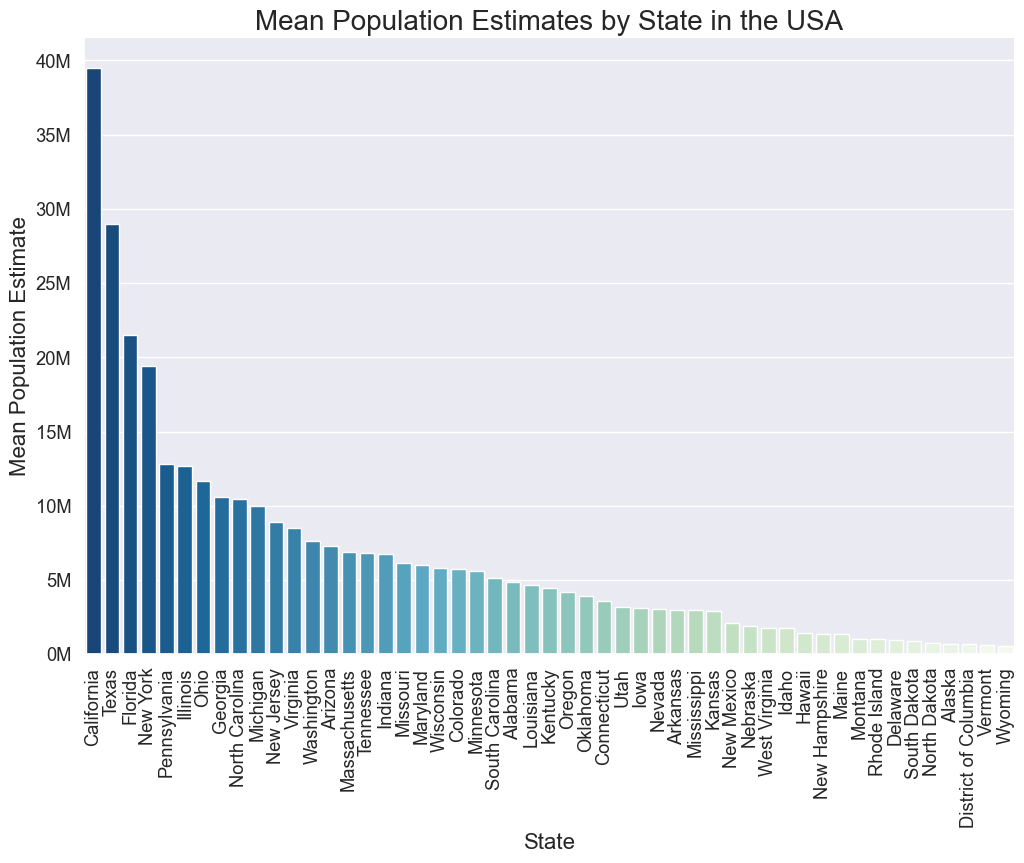

In [15]:
grouped_df_pop = data.groupby('state_usa')['estimate'].mean()
sorted_df_pop = grouped_df_pop.sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.set(font_scale=1.2)


palette = sns.color_palette("GnBu_r", len(sorted_df_pop))
sns.barplot(x=sorted_df_pop.index, y=sorted_df_pop, palette=palette)
plt.title('Mean Population Estimates by State in the USA', fontsize=20)
plt.ylabel('Mean Population Estimate', fontsize=16)
plt.xlabel('State', fontsize=16)
plt.xticks(rotation=90)


def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
sns.despine()
plt.show()

The data provided shows the estimated population for each state in the USA. California is the most populous state with an estimated population of approximately 39.5 million people, followed by Texas with approximately 29.0 million people and Florida with approximately 21.5 million people. New York and Pennsylvania round out the top five most populous states with estimated populations of approximately 19.5 million and 12.8 million people, respectively.

It is interesting to note that the population estimates vary greatly between states, with California having a population over six times larger than that of Wyoming, the least populous state with an estimated population of approximately 578,759 people. The population estimates could be used to inform decision-making processes that rely on understanding the demographics and needs of different states, such as allocation of resources for public services, planning for infrastructure development, and analysis of political representation.

# Feature Engineering

In [16]:
data["total_spent"] = (
    data["research_development_spent"]
    + data["marketing_spent"]
    + data["administration"]
)

data["spending_per_capita"] = (
    data["total_spent"] / data["average_income"]
)

data["price_range"] = data["max_price"] - data["min_price"]

data["income_range"] = data["maximum_income"] - data["minimum_income"]

data["spending_range"] = data["max_spending"] - data["min_spending"]

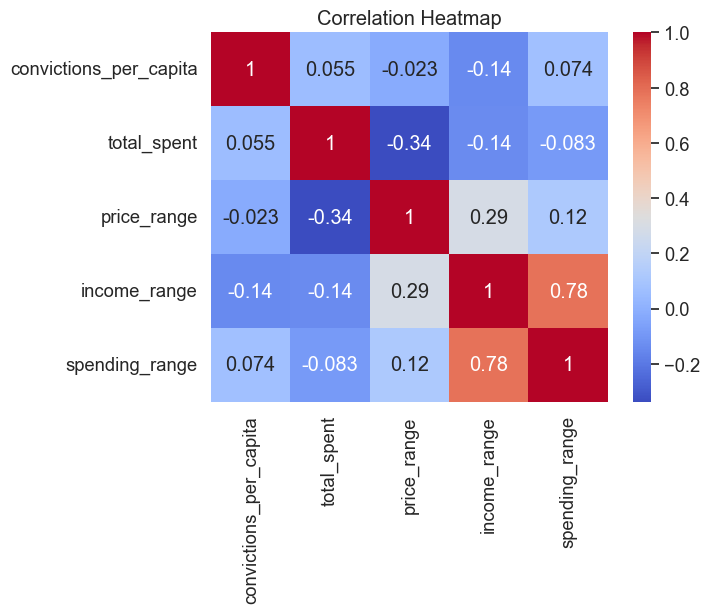

In [17]:
correlation_matrix = data[['convictions_per_capita', 'total_spent', 'price_range','income_range','spending_range']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation matrix results show that there is a weak correlation between the number of convictions per capita and total spending on healthcare. However, there is a moderate negative correlation between total spending on healthcare and the price range of healthcare services, which suggests that higher healthcare spending is associated with lower-priced healthcare services.

Additionally, there is a strong positive correlation between income levels and spending ranges, which indicates that areas with higher average incomes tend to have higher overall spending on healthcare. This finding aligns with previous research and may be due to greater access to healthcare services and more comprehensive insurance coverage among individuals with higher incomes.

Overall, this correlation matrix provides valuable insights into the relationship between healthcare spending, crime rates, and income levels. It can be used to identify areas with potential opportunities for investment and growth in the healthcare industry, and to develop targeted strategies for improving healthcare access and outcomes.

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_columns = [
    "research_development_spent",
    "marketing_spent",
    "administration",
    "profit",
    "convictions_per_capita",
    "estimate",
    "average_income",
    "minimum_income",
    "maximum_income",
    "avg_spending",
    "min_spending",
    "max_spending",
    "avg_price",
    "min_price",
    "max_price",
    "total_spent",
    "spending_per_capita",
    "price_range",
    "income_range",
    "spending_range",
]

data_normalized = data.copy()
data_normalized[normalized_columns] = scaler.fit_transform(data[normalized_columns])

In [19]:
weights = {
    "population_size": 0.1,
    "market_potential": 0.3,
    "business_environment": 0.2,
    "business_cost": 0.2,
    "availability_of_talent_and_workforce": 0.1,
    "quality_of_life": 0.1
}


In [20]:
def calculate_score(row):
    score = 0
    score += row["estimate"] * weights["population_size"]
    score += row["avg_spending"] * weights["market_potential"]
    score += (1 - row["convictions_per_capita"]) * weights["business_environment"]
    score += (1 - row["total_spent"]) * weights["business_cost"]
    score += row["average_income"] * weights["availability_of_talent_and_workforce"]
    score += (1 - row["price_range"]) * weights["quality_of_life"]
    return score

data_normalized["score"] = data_normalized.apply(calculate_score, axis=1)
data_ranked = data_normalized.sort_values(by="score", ascending=False)
data_ranked

,research_development_spent,administration,marketing_spent,state_usa,profit,convictions_per_capita,estimate,avg_price,min_price,max_price,...,maximum_income,avg_spending,min_spending,max_spending,total_spent,spending_per_capita,price_range,income_range,spending_range,score
119,0.031489,0.563516,0.236326,Massachusetts,0.818536,0.232323,0.162168,0.599652,0.594595,0.172414,...,0.746149,1.000000,1.000000,1.000000,0.116226,0.069697,0.113208,0.725150,0.888889,0.819040
118,0.140436,0.254839,0.115180,Massachusetts,0.650638,0.232323,0.162168,0.599652,0.594595,0.172414,...,0.746149,1.000000,1.000000,1.000000,0.172539,0.104767,0.113208,0.725150,0.888889,0.807778
40,0.000000,0.642902,0.000000,California,0.009508,0.083333,1.000000,0.968869,0.729730,0.275862,...,0.794558,0.557906,0.142857,0.636364,0.039114,0.022655,0.207547,0.805079,0.777778,0.801376
41,0.000000,0.503423,0.095749,California,0.000000,0.083333,1.000000,0.968869,0.729730,0.275862,...,0.794558,0.557906,0.142857,0.636364,0.051690,0.030680,0.207547,0.805079,0.777778,0.798861
207,0.303609,0.244841,0.159581,Hawaii,0.707164,0.000000,0.021501,1.000000,1.000000,0.224138,...,0.581289,1.000000,1.000000,1.000000,0.335144,0.218492,0.113208,0.543920,0.888889,0.797587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.914182,0.201235,0.110716,Idaho,0.034080,0.087121,0.031035,0.000000,0.000000,0.051724,...,0.157652,0.000000,0.142857,0.090909,0.895485,0.864064,0.064151,0.174735,0.111111,0.317069
125,0.828197,0.562957,0.120125,Mississippi,0.221961,0.252525,0.061577,0.025525,0.054054,0.051724,...,0.034724,0.109131,0.000000,0.090909,0.839255,0.922860,0.056604,0.052489,0.166667,0.316914
108,0.896851,0.218296,0.218532,Montana,0.442274,0.083333,0.012586,0.070317,0.054054,0.068966,...,0.149072,0.000000,0.142857,0.090909,0.904186,0.850825,0.075472,0.158269,0.111111,0.316192
126,0.832271,0.460800,0.167382,Mississippi,0.935778,0.252525,0.061577,0.025525,0.054054,0.051724,...,0.034724,0.109131,0.000000,0.090909,0.847217,0.931533,0.056604,0.052489,0.166667,0.315321


In [21]:
def sensitivity_analysis(data_normalized, weights):
    data_normalized["score"] = data_normalized.apply(calculate_score, axis=1)
    data_ranked = data_normalized.sort_values(by="score", ascending=False)
    return data_ranked

# Test different weights and observe the changes in rankings
alternative_weights = {
    "market_potential": 0.25,
    "business_environment": 0.25,
    "population_size": 0.15,
    "business_cost": 0.15,
    "availability_of_talent_and_workforce": 0.1,
    "quality_of_life": 0.1
}
data_ranked_alt = sensitivity_analysis(data_normalized, alternative_weights)
data_ranked_alt

,research_development_spent,administration,marketing_spent,state_usa,profit,convictions_per_capita,estimate,avg_price,min_price,max_price,...,maximum_income,avg_spending,min_spending,max_spending,total_spent,spending_per_capita,price_range,income_range,spending_range,score
119,0.031489,0.563516,0.236326,Massachusetts,0.818536,0.232323,0.162168,0.599652,0.594595,0.172414,...,0.746149,1.000000,1.000000,1.000000,0.116226,0.069697,0.113208,0.725150,0.888889,0.819040
118,0.140436,0.254839,0.115180,Massachusetts,0.650638,0.232323,0.162168,0.599652,0.594595,0.172414,...,0.746149,1.000000,1.000000,1.000000,0.172539,0.104767,0.113208,0.725150,0.888889,0.807778
40,0.000000,0.642902,0.000000,California,0.009508,0.083333,1.000000,0.968869,0.729730,0.275862,...,0.794558,0.557906,0.142857,0.636364,0.039114,0.022655,0.207547,0.805079,0.777778,0.801376
41,0.000000,0.503423,0.095749,California,0.000000,0.083333,1.000000,0.968869,0.729730,0.275862,...,0.794558,0.557906,0.142857,0.636364,0.051690,0.030680,0.207547,0.805079,0.777778,0.798861
207,0.303609,0.244841,0.159581,Hawaii,0.707164,0.000000,0.021501,1.000000,1.000000,0.224138,...,0.581289,1.000000,1.000000,1.000000,0.335144,0.218492,0.113208,0.543920,0.888889,0.797587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.914182,0.201235,0.110716,Idaho,0.034080,0.087121,0.031035,0.000000,0.000000,0.051724,...,0.157652,0.000000,0.142857,0.090909,0.895485,0.864064,0.064151,0.174735,0.111111,0.317069
125,0.828197,0.562957,0.120125,Mississippi,0.221961,0.252525,0.061577,0.025525,0.054054,0.051724,...,0.034724,0.109131,0.000000,0.090909,0.839255,0.922860,0.056604,0.052489,0.166667,0.316914
108,0.896851,0.218296,0.218532,Montana,0.442274,0.083333,0.012586,0.070317,0.054054,0.068966,...,0.149072,0.000000,0.142857,0.090909,0.904186,0.850825,0.075472,0.158269,0.111111,0.316192
126,0.832271,0.460800,0.167382,Mississippi,0.935778,0.252525,0.061577,0.025525,0.054054,0.051724,...,0.034724,0.109131,0.000000,0.090909,0.847217,0.931533,0.056604,0.052489,0.166667,0.315321


In [22]:
top_5_states = data_ranked.groupby('state_usa')['score'].mean().sort_values(ascending=False).head(5)
top_5_states_df = pd.DataFrame({'State': top_5_states.index, 'Mean Score': top_5_states.values})
print("The Top 5 best states for expansion are:")
print(top_5_states_df)

The Top 5 best states for expansion are:
           State  Mean Score
0     California    0.759354
1  Massachusetts    0.759035
2         Hawaii    0.758761
3     New Jersey    0.758510
4  New Hampshire    0.704145
